## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Objectives

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

In [1]:
#Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


# 1. Reading and Inspecting data

## 1.1 Reading data

In [2]:
# Reading the data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Basic inspection of data

In [3]:
# Checking the shape of the data
leads.shape

(9240, 37)

In [4]:
# Checking the info of data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that, there are few columns with missing values.

In [5]:
# Checking numerical columns of the data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2. Cleaning Data

In [6]:
# Converting the values to lower case for ease of working.
leads = leads.applymap(lambda x:x.lower() if type(x) == str else x)

In [7]:
# Replacing 'Select' with NaN as 'Select' indicates that no option is selected and is equivalent to NULL.
leads = leads.replace('select',np.nan)

In [9]:
# Checking the columns for number of unique values.
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

We will remove the columns having only 1 unique value in them as these columns will not be useful for the model building.
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [10]:
# Dropping the above mentioned columns.
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
                    'Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# Checking the shape of data.
leads.shape

(9240, 32)

In [12]:
# Checking the percentage of missing values in columns
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

Dropping the columns having more than 35% of null values. Columns to be dropped are:
- Specialization
- How did you hear about X Education
- Tags
- Lead Quality
- Lead Profile
- City
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

In [13]:
# Dropping the above mentioned columns and creating a new dataframe.
leads_new = leads.drop(['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile','City',
                        'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                        'Asymmetrique Profile Score'], axis=1)

In [14]:
# Checking the shape of new dataframe
leads_new.shape

(9240, 22)

In [15]:
# Checking the head.
leads_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [16]:
# Again checking the percentage of missing values in columns
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
# Imputing the values in columns.
leads_new['What matters most to you in choosing a course'] = leads_new['What matters most to you in choosing a course'].fillna('NA')
leads_new['Country'] = leads_new['Country'].fillna('NA')
leads_new['What is your current occupation'] = leads_new['What is your current occupation'].fillna('NA')

In [18]:
# Again checking the percentage of missing values in columns
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
# Checking the info
leads_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [20]:
# Checking the value count in "Country" column.
leads_new["Country"].value_counts()

india                   6492
NA                      2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
canada                     4
nigeria                    4
germany                    4
south africa               4
sweden                     3
italy                      2
ghana                      2
netherlands                2
bangladesh                 2
china                      2
philippines                2
belgium                    2
asia/pacific region        2
uganda                     2
denmark                    1
sri lanka                  1
tanzania                   1
vietnam                    1
liberia                    1
indonesia     

In [21]:
# Function for creating the groups based on Country.
def column(x):
    group = ""
    if x == "india":
        group = "india"
    elif x == "NA":
        group = "NA"
    else:
        group = "out of india"
    return group

leads_new['Country'] = leads_new.apply(lambda x:column(x['Country']), axis = 1)
leads_new['Country'].value_counts()

india           6492
NA              2461
out of india     287
Name: Country, dtype: int64

In [22]:
leads_new = leads_new[leads_new.isnull().sum(axis=1) <1]

In [23]:
# Again checking the percentage of missing values in columns
round(100*(leads_new.isnull().sum()/len(leads_new.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [24]:
# Removing the 'Prospect ID' column as it has unique value for each row and will not be useful for model building.
leads_new = leads_new.drop('Prospect ID', axis=1)

In [25]:
# Checking the shape
leads_new.shape

(9074, 21)

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

### 3.1.1 Categorical Variables

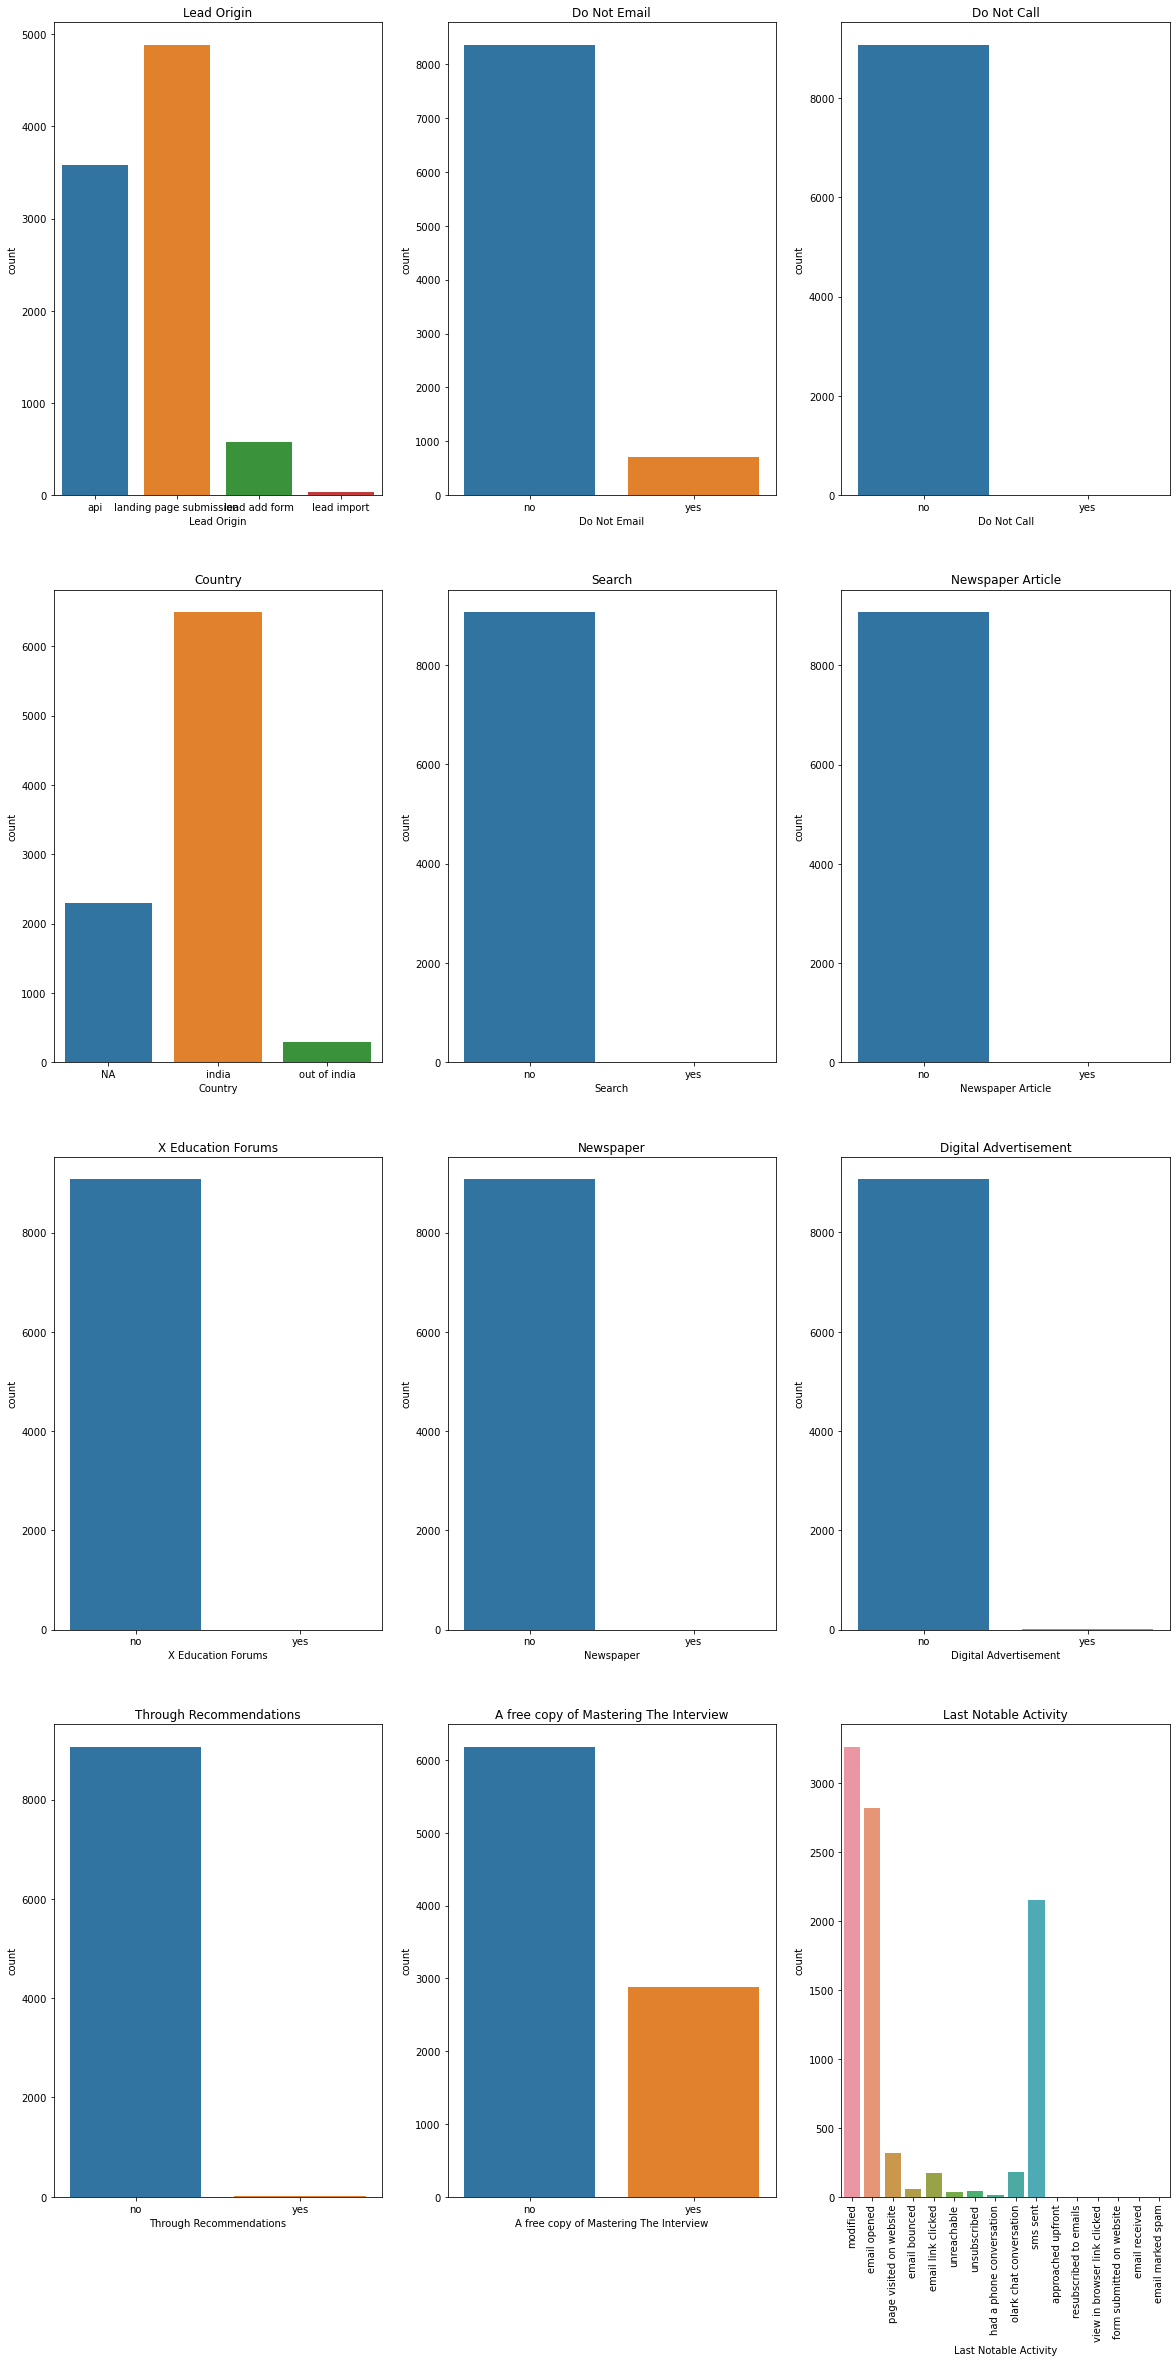

In [27]:
plt.figure(figsize = (20,40)) # Setting the figure size for ease of reading the plot

plt.subplot(4,3,1)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Lead Origin'])
plt.title('Lead Origin')  # Setting the title for the plot

plt.subplot(4,3,2)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Do Not Email'])
plt.title('Do Not Email')  # Setting the title for the plot

plt.subplot(4,3,3)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Do Not Call'])
plt.title('Do Not Call')  # Setting the title for the plot

plt.subplot(4,3,4)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Country'])
plt.title('Country')  # Setting the title for the plot

plt.subplot(4,3,5)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Search'])
plt.title('Search')  # Setting the title for the plot

plt.subplot(4,3,6)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Newspaper Article'])
plt.title('Newspaper Article')  # Setting the title for the plot

plt.subplot(4,3,7)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['X Education Forums'])
plt.title('X Education Forums')  # Setting the title for the plot

plt.subplot(4,3,8)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Newspaper'])
plt.title('Newspaper')  # Setting the title for the plot

plt.subplot(4,3,9)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Digital Advertisement'])
plt.title('Digital Advertisement')  # Setting the title for the plot

plt.subplot(4,3,10)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Through Recommendations'])
plt.title('Through Recommendations')  # Setting the title for the plot

plt.subplot(4,3,11)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')  # Setting the title for the plot

plt.subplot(4,3,12)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Last Notable Activity']).tick_params(axis='x', rotation = 90)  # Rotating the x-ticks for better readability
plt.title('Last Notable Activity')  # Setting the title for the plot

plt.show()

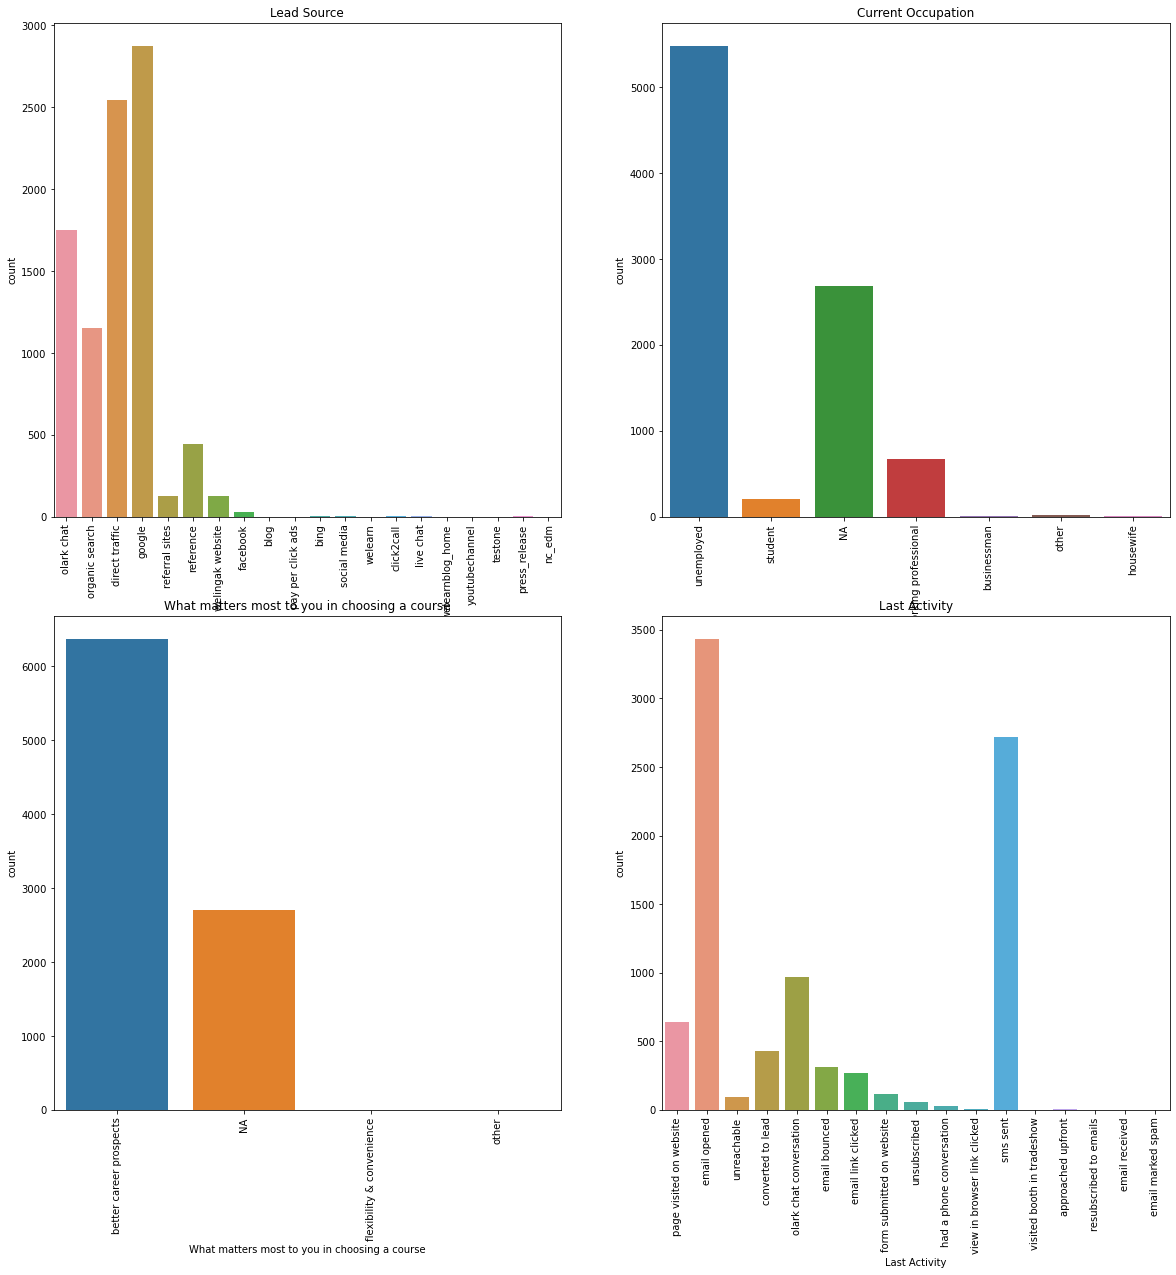

In [135]:
plt.figure(figsize = (20,20))  # Setting the figure size for ease of reading the plot

plt.subplot(2,2,1)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')  # Setting the title for the plot

plt.subplot(2,2,2)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')  # Setting the title for the plot

plt.subplot(2,2,3)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')  # Setting the title for the plot

plt.subplot(2,2,4)  # Subplot for ease of comparing the plots
sns.countplot(leads_new['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')  # Setting the title for the plot

plt.show()

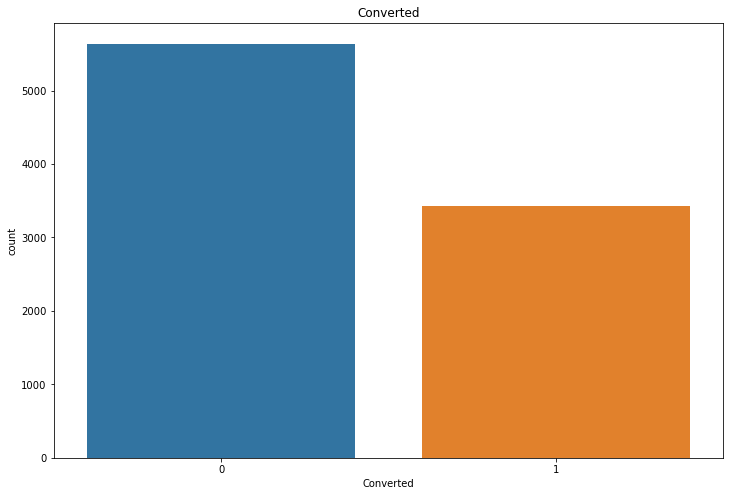

In [31]:
# Plot for target variable "Converted"
plt.figure(figsize = (12,8))  # Setting the figure size for ease of reading the plot
sns.countplot(leads_new['Converted'])  
plt.title('Converted')  # Setting the title for the plot
plt.show()

### 3.1.2 Numerical Variables

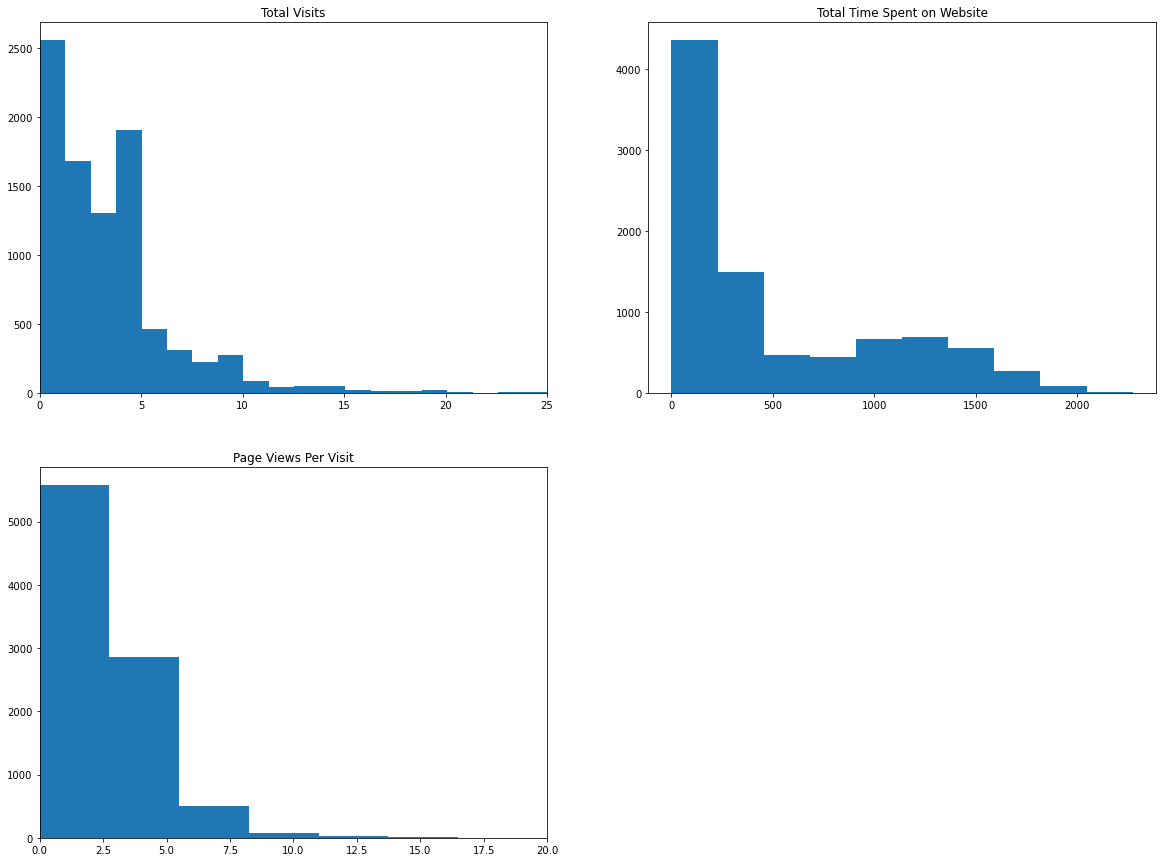

In [32]:
plt.figure(figsize = (20,15))  # Setting the figure size for ease of reading the plot

plt.subplot(221)  # Subplot for ease of comparing the plots
plt.hist(leads_new['TotalVisits'], bins = 200)
plt.title('Total Visits')  # Setting the title for the plot
plt.xlim(0,25)

plt.subplot(222)  # Subplot for ease of comparing the plots
plt.hist(leads_new['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')  # Setting the title for the plot

plt.subplot(223)  # Subplot for ease of comparing the plots
plt.hist(leads_new['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')  # Setting the title for the plot
plt.xlim(0,20)
plt.show()

## 3.2 Categorical variables based on Target variable

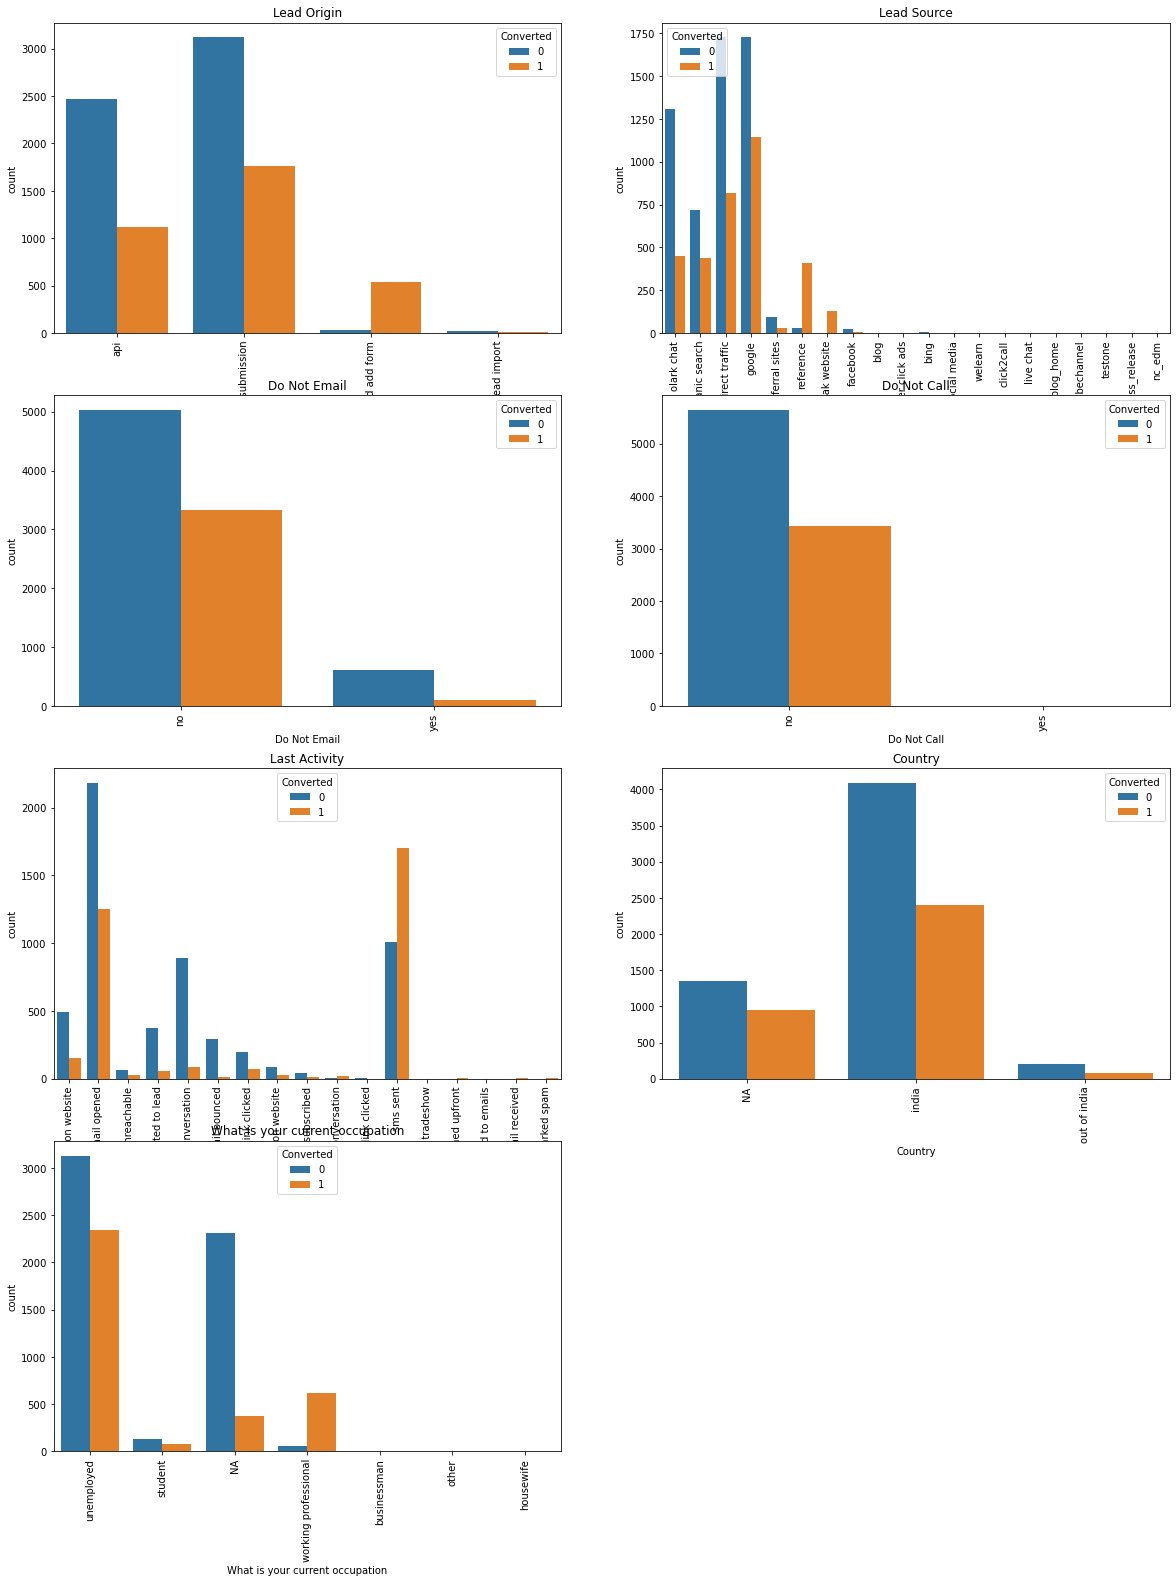

In [38]:
plt.figure(figsize = (20,40))  # Setting the figure size for ease of reading the plot

plt.subplot(6,2,1)  # Subplot for ease of comparing the plots
sns.countplot(x='Lead Origin', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')  # Setting the title for the plot

plt.subplot(6,2,2)  # Subplot for ease of comparing the plots
sns.countplot(x='Lead Source', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')  # Setting the title for the plot

plt.subplot(6,2,3)  # Subplot for ease of comparing the plots
sns.countplot(x='Do Not Email', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')  # Setting the title for the plot

plt.subplot(6,2,4)  # Subplot for ease of comparing the plots
sns.countplot(x='Do Not Call', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')  # Setting the title for the plot

plt.subplot(6,2,5)  # Subplot for ease of comparing the plots
sns.countplot(x='Last Activity', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')  # Setting the title for the plot

plt.subplot(6,2,6)  # Subplot for ease of comparing the plots
sns.countplot(x='Country', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Country')  # Setting the title for the plot

plt.subplot(6,2,7)  # Subplot for ease of comparing the plots
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')  # Setting the title for the plot

plt.show()

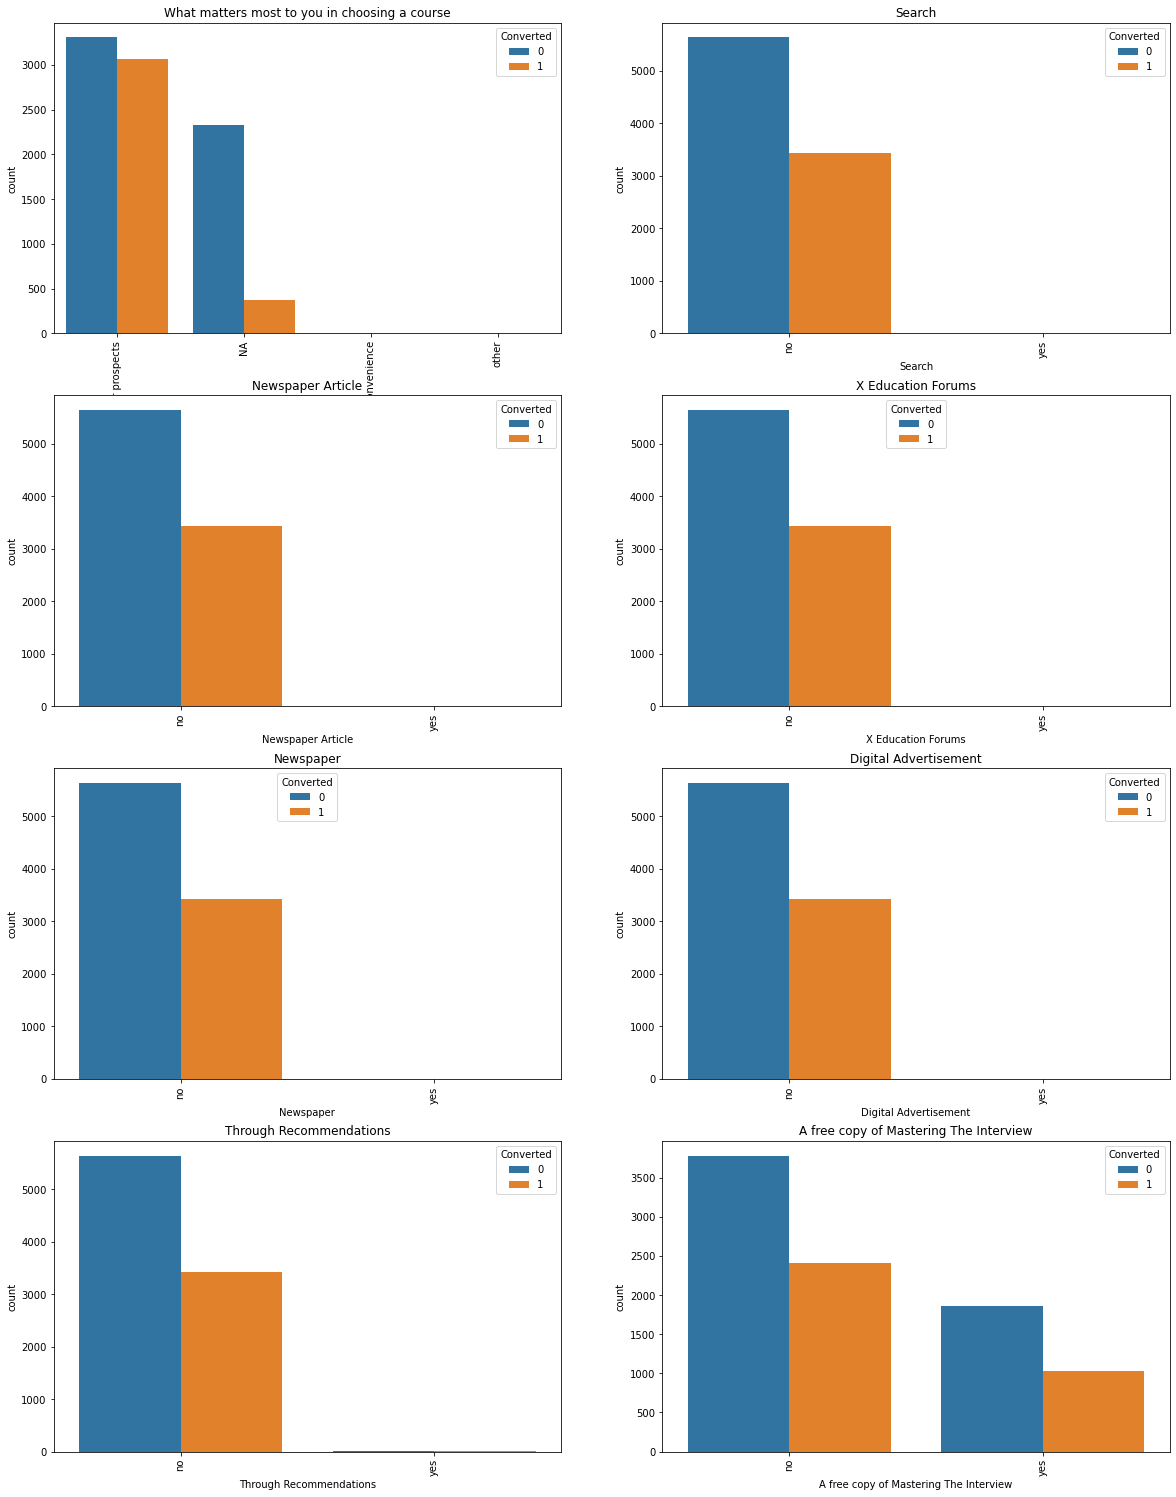

In [39]:
plt.figure(figsize = (20,40))  # Setting the figure size for ease of reading the plot

plt.subplot(6,2,1)  # Subplot for ease of comparing the plots
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')  # Setting the title for the plot

plt.subplot(6,2,2)  # Subplot for ease of comparing the plots
sns.countplot(x='Search', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Search')  # Setting the title for the plot

plt.subplot(6,2,3)  # Subplot for ease of comparing the plots
sns.countplot(x='Newspaper Article', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')  # Setting the title for the plot

plt.subplot(6,2,4)  # Subplot for ease of comparing the plots
sns.countplot(x='X Education Forums', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')  # Setting the title for the plot

plt.subplot(6,2,5)  # Subplot for ease of comparing the plots
sns.countplot(x='Newspaper', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')  # Setting the title for the plot

plt.subplot(6,2,6)  # Subplot for ease of comparing the plots
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')  # Setting the title for the plot

plt.subplot(6,2,7)  # Subplot for ease of comparing the plots
sns.countplot(x='Through Recommendations', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')  # Setting the title for the plot

plt.subplot(6,2,8)  # Subplot for ease of comparing the plots
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')  # Setting the title for the plot

plt.show()

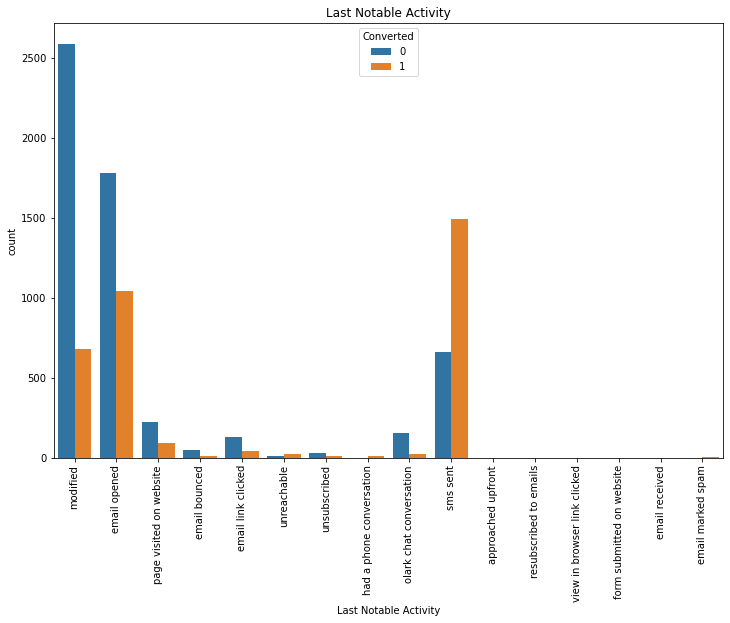

In [40]:
# Plot for 'Last Notable Activity'.
plt.figure(figsize = (12,8))  # Setting the figure size for ease of reading the plot
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_new).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')   # Setting the title for the plot
plt.show()

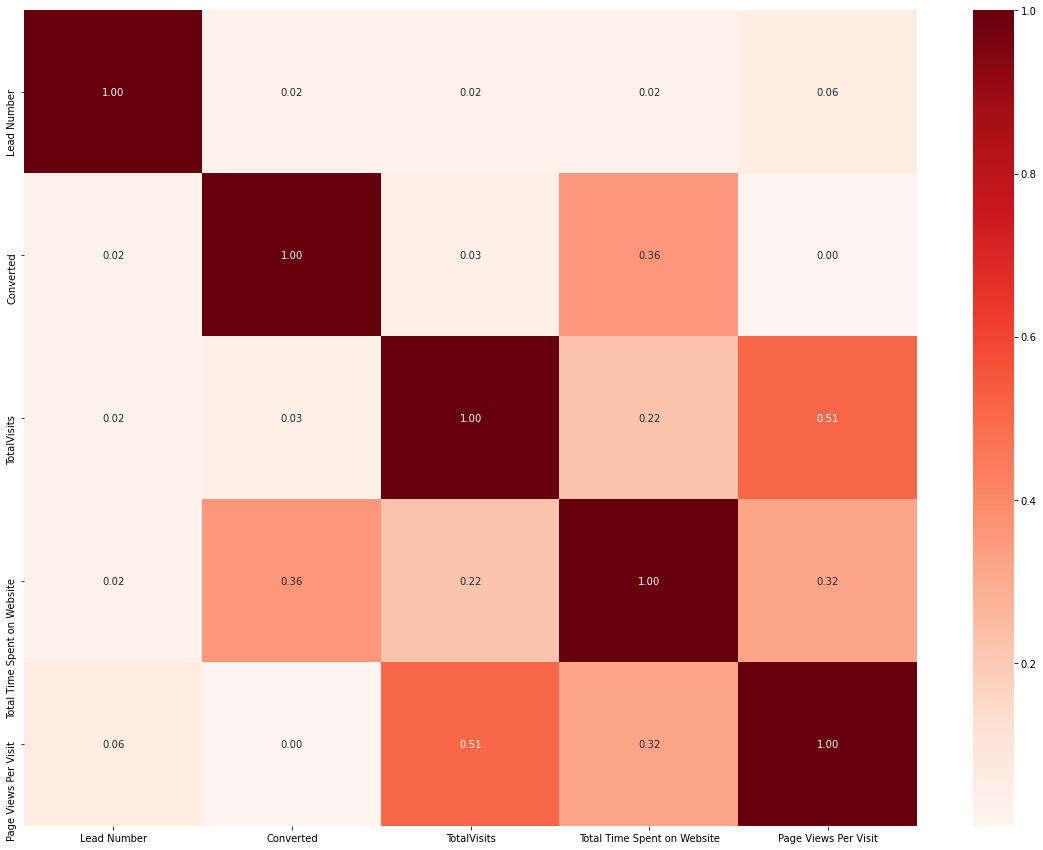

In [44]:
# Checking the correlation among the variables
plt.figure(figsize=(20,15))   # Setting the figure size for ease of reading the plot
sns.heatmap(leads_new.corr(), cmap='Reds', annot=True, fmt='.2f')
plt.show()

# 4. Creating Dummy variables

In [45]:
leads_new.loc[:, leads_new.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Creating dummy variables using the 'get_dummies' and dropping the first column
dummies = pd.get_dummies(leads_new[['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation',
                                 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [47]:
# Concating the dummies to the dataframe.
# Creating new dataframe "dummy_leads"
dummy_leads = pd.concat([leads_new, dummies], axis=1)
dummy_leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,0,0,1,0,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,0,0,1,0,0,0,0,0,0,0


In [48]:
dummy_leads = dummy_leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 
                                  'What is your current occupation','What matters most to you in choosing a course', 'Search',
                                  'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 
                                  'Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity'], axis=1)

In [49]:
dummy_leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# 5. Test-Train Split

In [50]:
# Importing the train_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [51]:
X = dummy_leads.drop(['Converted'], axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
y = dummy_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Splitting the dataset into 70% and 30% for train and test datasets respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [54]:
# Importing  MinMax scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [55]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,646334,0.014184,0.612676,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,607128,0.042553,0.751761,0.250000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,0.014184,0.787852,0.083333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


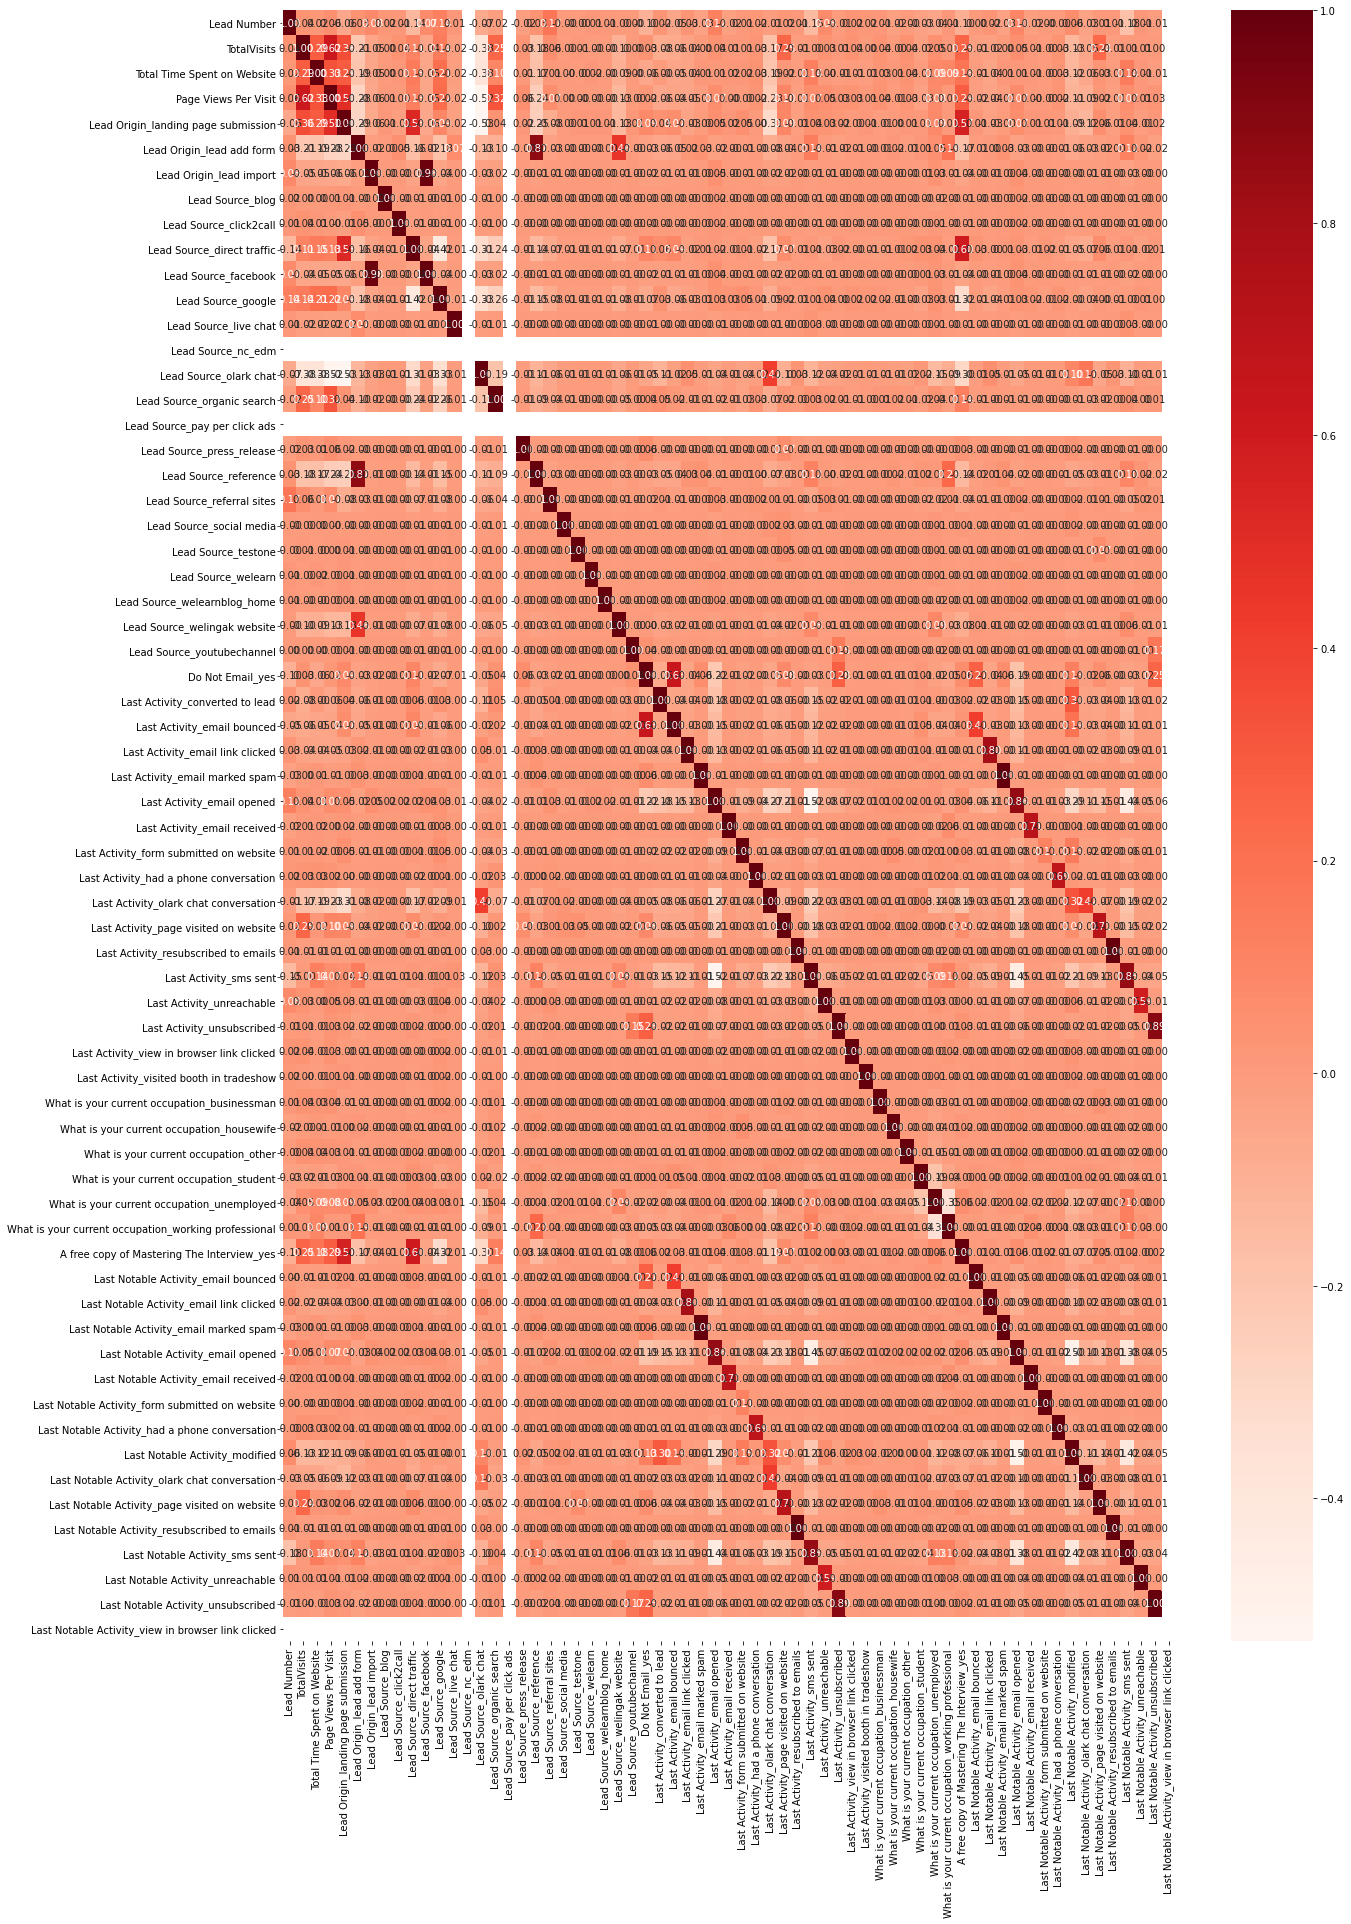

In [56]:
# Checking the correlation among the variables
plt.figure(figsize=(20,30))  # Setting the figure size for ease of reading the plot
sns.heatmap(X_train.corr(), cmap='Reds', annot=True, fmt='.2f')
plt.show()

# 6. Model Building

In [57]:
# Importing 'LogisticRegression' from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
# Importing RFE from sklearn
from sklearn.feature_selection import RFE

In [59]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [60]:
# Features that have been selected by RFE are
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 29),
 ('Lead Source_blog', False, 47),
 ('Lead Source_click2call', False, 37),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 27),
 ('Lead Source_google', False, 9),
 ('Lead Source_live chat', False, 30),
 ('Lead Source_nc_edm', False, 50),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 14),
 ('Lead Source_pay per click ads', False, 49),
 ('Lead Source_press_release', False, 35),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', False, 16),
 ('Lead Source_social media', False, 48),
 ('Lead Source_testone', False, 42),
 ('Lead Source_welearn', False, 36),
 ('Lead Source_welearnblog_home', False, 45),
 ('Lead Source_welingak website', False, 6),
 ('Lea

In [61]:
# Put all the columns selected by RFE in the variable 'cols'
cols = X_train.columns[rfe.support_]

In [62]:
# Selecting columns selected by RFE
X_train = X_train[cols]

In [65]:
# Importing statsmodels as sm
import statsmodels.api as sm

## 6.1 First Model

In [66]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.5
Date:                Wed, 08 Sep 2021   Deviance:                       5227.1
Time:                        13:03:56   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7646      0.992     -7.830      0.000      -9.708      -5.821
Lead Number                                           8.198e-06   1.57e-06      5.235      0.000    5.13e-06    1.13e-05
Total Time Spent on Website                              4.6477      0.167     27.818      0.000       4.320       4.975
Lead Origin_landing page submission                     -0.1699      0.098     -1.741      0.082      -0.361       0.021
Lead Origin_lead add form                                5.2351      0.727      7.204      0.000       3.811       6.659
Lead Source_direct traffic                              -0.2202      0.090     -2.437      0.015      -0.397      -0.043
Lead Source_olark chat                                   1.2035      0.122      9.893      0.000       0.965       1.442
Lead Source_reference                                   -1.7145      0.753     -2.278      0.023      -3.190      -0.239
Do Not Email_yes                                        -1.0906      0.200     -5.441      0.000      -1.483      -0.698
Last Activity_email bounced                             -0.5834      0.386     -1.510      0.131      -1.341       0.174
Last Activity_olark chat conversation                   -1.1751      0.175     -6.723      0.000      -1.518      -0.833
Last Activity_sms sent                                   0.7565      0.161      4.713      0.000       0.442       1.071
What is your current occupation_unemployed               0.9479      0.082     11.577      0.000       0.787       1.108
What is your current occupation_working professional     3.5117      0.206     17.084      0.000       3.109       3.915
Last Notable Activity_modified                          -0.6002      0.096     -6.283      0.000      -0.787      -0.413
Last Notable Activity_sms sent                           0.5816      0.181      3.209      0.001       0.226       0.937
========================================================================================================================
"""

In [71]:
# Importing 'variance_inflation_factor' from 'statsmodels' library.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_df_vif(local_df):
    df_vif = pd.DataFrame()
    df_vif['Features'] = local_df.columns
    df_vif['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif = df_vif.sort_values(by='VIF', ascending=False)
    df_vif = df_vif.reset_index(drop=True)
    return df_vif

In [73]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,794.07
1,Last Notable Activity_sms sent,5.05
2,Lead Origin_lead add form,4.49
3,Last Activity_sms sent,4.43
4,Lead Source_reference,4.19
5,Lead Origin_landing page submission,2.09
6,Lead Source_olark chat,1.95
7,Last Notable Activity_modified,1.56
8,Last Activity_olark chat conversation,1.44
9,Lead Source_direct traffic,1.43


From the model we can see that, 
- 'Last Activity_email bounced' has P-value 0.131. As columns with P-value greater than 0.05 can be dropped, we will drop this column. 

In [69]:
# Dropping 'Last Activity_email bounced' as it has a high P-value
X_train.drop('Last Activity_email bounced', axis = 1, inplace = True)

## 6.2 Second Model

In [70]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model2 = logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.8
Date:                Wed, 08 Sep 2021   Deviance:                       5229.5
Time:                        13:08:03   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7488      0.991     -7.818      0.000      -9.692      -5.806
Lead Number                                           8.171e-06   1.57e-06      5.221      0.000     5.1e-06    1.12e-05
Total Time Spent on Website                              4.6474      0.167     27.830      0.000       4.320       4.975
Lead Origin_landing page submission                     -0.1711      0.098     -1.754      0.079      -0.362       0.020
Lead Origin_lead add form                                5.2316      0.726      7.206      0.000       3.809       6.655
Lead Source_direct traffic                              -0.2221      0.090     -2.458      0.014      -0.399      -0.045
Lead Source_olark chat                                   1.1980      0.122      9.854      0.000       0.960       1.436
Lead Source_reference                                   -1.6986      0.752     -2.259      0.024      -3.172      -0.225
Do Not Email_yes                                        -1.2500      0.174     -7.167      0.000      -1.592      -0.908
Last Activity_olark chat conversation                   -1.1575      0.174     -6.635      0.000      -1.499      -0.816
Last Activity_sms sent                                   0.7818      0.160      4.890      0.000       0.468       1.095
What is your current occupation_unemployed               0.9498      0.082     11.602      0.000       0.789       1.110
What is your current occupation_working professional     3.5072      0.205     17.103      0.000       3.105       3.909
Last Notable Activity_modified                          -0.6170      0.095     -6.504      0.000      -0.803      -0.431
Last Notable Activity_sms sent                           0.5665      0.181      3.127      0.002       0.211       0.922
========================================================================================================================
"""

In [72]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,794.07
1,Last Notable Activity_sms sent,5.05
2,Lead Origin_lead add form,4.49
3,Last Activity_sms sent,4.43
4,Lead Source_reference,4.19
5,Lead Origin_landing page submission,2.09
6,Lead Source_olark chat,1.95
7,Last Notable Activity_modified,1.56
8,Last Activity_olark chat conversation,1.44
9,Lead Source_direct traffic,1.43


From the model we can see that,
- 'Lead Origin_landing page submission' has a P-value 0.079 which is more than 0.05. Therefore, dropping the column.

In [74]:
# Dropping column 'Lead Origin_landing page submission' as it has high P-value
X_train.drop('Lead Origin_landing page submission', axis = 1, inplace = True)

## 6.3 Third Model

In [75]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model3 = logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.3
Date:                Wed, 08 Sep 2021   Deviance:                       5232.6
Time:                        13:22:08   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.9266      0.987     -8.034      0.000      -9.860      -5.993
Lead Number                                           8.297e-06   1.56e-06      5.305      0.000    5.23e-06    1.14e-05
Total Time Spent on Website                              4.6464      0.167     27.825      0.000       4.319       4.974
Lead Origin_lead add form                                5.3351      0.724      7.372      0.000       3.917       6.754
Lead Source_direct traffic                              -0.2834      0.083     -3.408      0.001      -0.446      -0.120
Lead Source_olark chat                                   1.2972      0.108     11.995      0.000       1.085       1.509
Lead Source_reference                                   -1.6986      0.752     -2.259      0.024      -3.172      -0.225
Do Not Email_yes                                        -1.2523      0.174     -7.192      0.000      -1.594      -0.911
Last Activity_olark chat conversation                   -1.1347      0.174     -6.525      0.000      -1.476      -0.794
Last Activity_sms sent                                   0.7787      0.160      4.875      0.000       0.466       1.092
What is your current occupation_unemployed               0.9444      0.082     11.552      0.000       0.784       1.105
What is your current occupation_working professional     3.4928      0.205     17.052      0.000       3.091       3.894
Last Notable Activity_modified                          -0.6121      0.095     -6.455      0.000      -0.798      -0.426
Last Notable Activity_sms sent                           0.5704      0.181      3.151      0.002       0.216       0.925
========================================================================================================================
"""

In [76]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,785.49
1,Last Notable Activity_sms sent,5.05
2,Last Activity_sms sent,4.43
3,Lead Origin_lead add form,4.31
4,Lead Source_reference,4.19
5,Lead Source_olark chat,1.57
6,Last Notable Activity_modified,1.56
7,Last Activity_olark chat conversation,1.43
8,Total Time Spent on Website,1.32
9,What is your current occupation_working profes...,1.30


From the model we can see that,
- All the features have P-value less than 0.05.
- Column 'Last Notable Activity_sms sent' has VIF of 5.05. Columns with VIF value greater than 5 can be dropped.

In [77]:
# Dropping column 'Last Notable Activity_sms sent' as it has high VIF value
X_train.drop('Last Notable Activity_sms sent', axis = 1, inplace = True)

## 6.4 Fourth Model

In [78]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model4 = logm4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.3
Date:                Wed, 08 Sep 2021   Deviance:                       5242.6
Time:                        13:29:41   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.6576      0.981     -7.803      0.000      -9.581      -5.734
Lead Number                                           7.907e-06   1.56e-06      5.077      0.000    4.85e-06     1.1e-05
Total Time Spent on Website                              4.6417      0.167     27.806      0.000       4.315       4.969
Lead Origin_lead add form                                5.2773      0.723      7.302      0.000       3.861       6.694
Lead Source_direct traffic                              -0.2855      0.083     -3.438      0.001      -0.448      -0.123
Lead Source_olark chat                                   1.2899      0.108     11.957      0.000       1.078       1.501
Lead Source_reference                                   -1.6614      0.751     -2.211      0.027      -3.134      -0.189
Do Not Email_yes                                        -1.2361      0.174     -7.110      0.000      -1.577      -0.895
Last Activity_olark chat conversation                   -1.0591      0.173     -6.134      0.000      -1.397      -0.721
Last Activity_sms sent                                   1.2203      0.076     16.023      0.000       1.071       1.370
What is your current occupation_unemployed               0.9729      0.081     11.986      0.000       0.814       1.132
What is your current occupation_working professional     3.5235      0.205     17.184      0.000       3.122       3.925
Last Notable Activity_modified                          -0.7710      0.081     -9.477      0.000      -0.931      -0.612
========================================================================================================================
"""

In [79]:
# Calculating the VIF
get_df_vif(X_train_sm)

,Features,VIF
0,const,780.64
1,Lead Origin_lead add form,4.31
2,Lead Source_reference,4.19
3,Lead Source_olark chat,1.57
4,Last Activity_olark chat conversation,1.39
5,Total Time Spent on Website,1.32
6,What is your current occupation_working profes...,1.29
7,What is your current occupation_unemployed,1.24
8,Lead Source_direct traffic,1.20
9,Last Notable Activity_modified,1.19


From the above model we can see that,
- All the features have P-values less that 0.05.
- All features have VIF value less than 5.

Therefore, we can finalize this model.

## 6.5 Making Predictions

In [80]:
# Predicting the probabilities on the train set
y_train_pred = model4.predict(X_train_sm)
y_train_pred.head()

1289    0.780640
3604    0.194898
5584    0.353429
7679    0.155040
7563    0.411659
dtype: float64

In [81]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78064033, 0.19489784, 0.3534293 , 0.15503958, 0.41165894,
       0.7696649 , 0.1367138 , 0.96278763, 0.76397184, 0.13511672])

In [82]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.780640
1,0,0.194898
2,0,0.353429
3,0,0.155040
4,0,0.411659


In [83]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.780640,1
1,0,0.194898,0
2,0,0.353429,0
3,0,0.155040,0
4,0,0.411659,0


# 7. Model Evaluation

In [84]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [85]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3455,  440],
       [ 742, 1714]], dtype=int64)

In [86]:
# Predicted     not_churn    churn
# Actual
# not_churn        3455       440
# churn             742      1714

In [87]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8138875767595655

In [88]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [89]:
# Calculating the sensitivity
TP/(TP+FN)

0.6978827361563518

In [90]:
# Calculating the specificity
TN/(TN+FP)

0.8870346598202824

## 7.1 Optimise Cut off (ROC Curve)

Previously we selected cutoff randomly. Now, we will find the optimum cutoff.

In [91]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

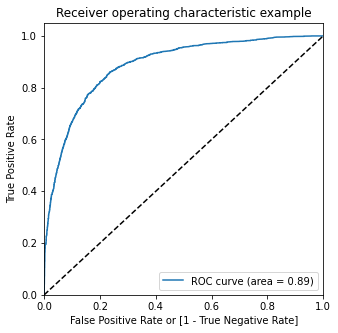

In [93]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [94]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.780640,1,1,1,1,1,1,1,1,1,0,0
1,0,0.194898,0,1,1,0,0,0,0,0,0,0,0
2,0,0.353429,0,1,1,1,1,0,0,0,0,0,0
3,0,0.155040,0,1,1,0,0,0,0,0,0,0,0
4,0,0.411659,0,1,1,1,1,1,0,0,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.615966,0.971498,0.391784
0.2,0.2,0.755157,0.915309,0.654172
0.3,0.3,0.798299,0.863192,0.757381
0.4,0.4,0.814202,0.779723,0.835944
0.5,0.5,0.813888,0.697883,0.887035
0.6,0.6,0.802708,0.625407,0.914506
0.7,0.7,0.778932,0.515472,0.945058
0.8,0.8,0.751693,0.412459,0.965597
0.9,0.9,0.710754,0.272394,0.987163


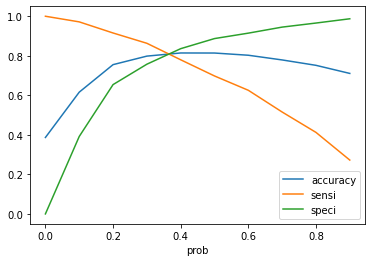

In [96]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.780640,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.194898,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.353429,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.155040,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.411659,0,1,1,1,1,1,0,0,0,0,0,1


In [98]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8079042670445599

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3120,  775],
       [ 445, 2011]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.8188110749185668

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.8010269576379975

## 7.2 Prediction on Test set

In [103]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [104]:
# Substituting all the columns in the final train model
col = X_train.columns

In [105]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Lead Number,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_olark chat,Lead Source_reference,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_modified
8308,1.0,586397,0.416813,0,1,0,0,0,0,0,1,0,1
7212,1.0,594083,0.001320,0,0,0,0,0,0,1,0,1,0
2085,1.0,639518,0.000000,1,0,0,0,0,0,0,1,0,0
4048,1.0,621209,0.617077,0,1,0,0,0,0,1,1,0,0
4790,1.0,614037,0.005282,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,628726,0.000000,0,0,1,0,0,1,0,1,0,1
8179,1.0,587396,0.148768,0,0,0,0,0,0,1,0,0,1
6236,1.0,601921,0.000000,0,0,1,0,0,0,0,0,0,0
5240,1.0,609576,0.458627,0,0,0,0,0,0,1,1,0,0


In [107]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = model4.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.236830
1,1,0.856859
2,1,0.974642
3,1,0.883498
4,0,0.109997


In [108]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.236830,0
1,1,0.856859,1
2,1,0.974642,1
3,1,0.883498,1
4,0,0.109997,0
...,...,...,...
2718,1,0.095008,0
2719,0,0.133128,0
2720,0,0.166778,0
2721,1,0.815174,1


In [109]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8138082996694822

In [110]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1401,  343],
       [ 164,  815]], dtype=int64)

In [111]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [112]:
# Calculating the sensitivity
TP/(TP+FN)

0.832482124616956

In [113]:
# Calculating the specificity
TN/(TN+FP)

0.8033256880733946

## 7.3 Precision-Recall

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3455,  440],
       [ 742, 1714]], dtype=int64)

In [115]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7957288765088208

In [116]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6978827361563518

### 7.3.1 Precision and recall tradeoff

In [117]:
# Importing precision recall curve from sklearn
from sklearn.metrics import precision_recall_curve

In [118]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

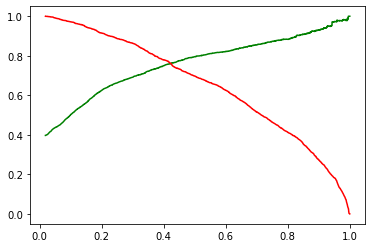

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.780640,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.194898,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.353429,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.155040,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.411659,0,1,1,1,1,1,0,0,0,0,0,1


In [122]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8159344985041725

In [123]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3279,  616],
       [ 553, 1903]], dtype=int64)

In [124]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [125]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7554585152838428

In [126]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7748371335504886

## 7.4 Prediction on Test set

In [127]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = model4.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.236830
1,1,0.856859
2,1,0.974642
3,1,0.883498
4,0,0.109997


In [128]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.236830,0
1,1,0.856859,1
2,1,0.974642,1
3,1,0.883498,1
4,0,0.109997,0
...,...,...,...
2718,1,0.095008,0
2719,0,0.133128,0
2720,0,0.166778,0
2721,1,0.815174,1


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8222548659566654

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1474,  270],
       [ 214,  765]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7391304347826086

In [133]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7814096016343207

# Conclusion

It was found that the variables that mattered the most in the potential buyers are:

- The total time spend on the Website.
- When the lead origin is Lead add format.
- When the lead source was:
a. Olark chat
b. Direct traffic
c. Reference

- When the last activity was:
a. SMS
b. Olark chat conversation

- When current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.